In [7]:
using Luxor
using PythonCall
using Colors
using OpenStreetMapXPlot
using Plots
using PlotlyJS
include("prepare_data.jl")
include("analyse.jl")
include("plots.jl")

plot_attractiveness_of_sectors_abs (generic function with 1 method)

In [8]:
points,attr,bounds = calculate_attractiveness_for_city_points("Kraków",
                                "8",1000,100,:education)

(ENU[ENU(212.60579133526886, 13.376022618057332, 0.0) ENU(211.34637496181847, 26.69925618576465, 0.0) … ENU(212.60579133526886, -13.37602261805731, 0.0) ENU(213.0261497806658, 1.3702887057427853e-13, 0.0); ENU(425.2115826705377, 26.752045236114665, 0.0) ENU(422.69274992363694, 53.3985123715293, 0.0) … ENU(425.2115826705377, -26.75204523611462, 0.0) ENU(426.0522995613316, 2.7405774114855707e-13, 0.0); … ; ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf); ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf) … ENU(Inf, Inf, Inf) ENU(Inf, Inf, Inf)], [991.1132425517648 988.1707465503682 … 990.5087618952113 972.8414307197139; 909.8390251288544 907.5525869263063 … 915.6366021168665 891.7263403809802; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], 5771×5 DataFrame
  Row │ adminname  wayid      nodes       x        y       
      │ String     Int64      Int64       Float64  Float64 
──────┼────────────────────────────────────────────────────
    1 │ Krakow      84775140  9971397601  

In [15]:
get_city_bounds("Kraków","8")

Dict{String, Any} with 4 entries:
  "maxlon" => 20.2173
  "minlon" => 19.7922
  "maxlat" => 50.1261
  "minlat" => 49.9677

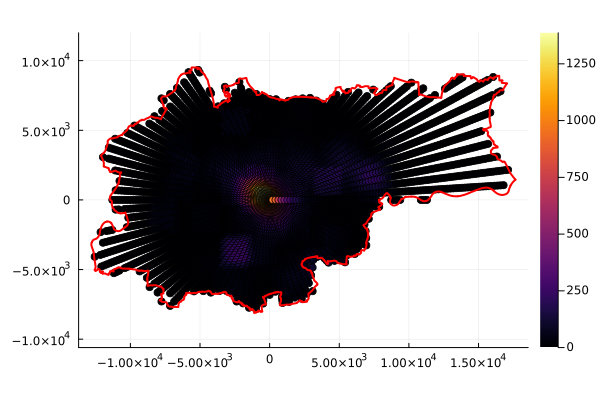

In [10]:
plot_heatmap(points,attr,bounds)